# Stage 2.5: Baseline vs Elementwise (1500 iters, wd=1450, lr=0.00468)

In [1]:
%%bash
source /workspace/ese-3060-project/.venv/bin/activate
python -m ipykernel install --user --name ese3060-venv --display-name "ese3060 venv"
echo "Kernel installed."

Installed kernelspec ese3060-venv in /root/.local/share/jupyter/kernels/ese3060-venv
Kernel installed.


In [1]:
import os, subprocess, json, glob, re
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%cd /workspace/ese-3060-project

PROJECT_ROOT = os.environ.get('PROJ_ROOT', '/workspace/ese-3060-project')
SCRIPT_PATH = os.path.join(PROJECT_ROOT, 'train_gpt.py')
RESULTS_ALL = os.path.join(PROJECT_ROOT, 'experiments', 'results.csv')
RESULTS = os.path.join(PROJECT_ROOT, 'experiments', 'results_stage2_5.csv')
LOG_DIR = os.path.join(PROJECT_ROOT, 'logs')
SPLITTER = os.path.join(PROJECT_ROOT, 'scripts', 'split_results.py')
PROJECT_ROOT, SCRIPT_PATH

/workspace/ese-3060-project


('/workspace/ese-3060-project', '/workspace/ese-3060-project/train_gpt.py')

In [2]:
# Runtime knobs
NPROC = None                # auto-detect if None
LR = 0.00468
SEEDS = [1337, 2337]        # two runs per config
NUM_ITER = 1500
WARMUP_ITERS = 0
WARMDOWN_ITERS = 1450
VAL_EVERY = 125
CONFIGS = {
    "baseline":    {"ATTNGATE": "none",        "GATEPOS": "sdpa", "GATEACT": "sigmoid"},
    "elementwise": {"ATTNGATE": "elementwise", "GATEPOS": "sdpa", "GATEACT": "sigmoid"},
}
TORCHRUN = "torchrun"
LAUNCH = True             # set True to actually run

# torchrun helpers
if NPROC is None:
    try:
        gpu_count = int(subprocess.check_output("nvidia-smi --list-gpus | wc -l", shell=True).decode().strip())
    except Exception:
        gpu_count = 0
    NPROC = max(gpu_count, 1)

assert os.path.exists(SCRIPT_PATH), f"Missing train script: {SCRIPT_PATH}"

def run_job(name, cfg, seed):
    env = os.environ.copy()
    env.update({
        "ATTNGATE": cfg["ATTNGATE"],
        "GATEPOS": cfg["GATEPOS"],
        "GATEACT": cfg["GATEACT"],
        "LR": str(LR),
        "SEED": str(seed),
        "NUM_ITERATIONS": str(NUM_ITER),
        "WARMUP_ITERS": str(WARMUP_ITERS),
        "WARMDOWN_ITERS": str(WARMDOWN_ITERS),
        "VAL_EVERY": str(VAL_EVERY),
    })
    cmd = [TORCHRUN, "--standalone", f"--nproc_per_node={NPROC}", SCRIPT_PATH]
    print(f"\n>>> Launching {name} seed={seed} lr={LR:.5f} nproc={NPROC}")
    if not LAUNCH:
        return 0
    proc = subprocess.run(cmd, env=env)
    if proc.returncode != 0:
        raise RuntimeError(f"Run failed: {name} seed {seed} rc={proc.returncode}")

for cfg_name, cfg_env in CONFIGS.items():
    for seed in SEEDS:
        run_job(cfg_name, cfg_env, seed)

if LAUNCH:
    # after runs, refresh splits
    subprocess.run(["python", SPLITTER, "--stage1-iters", "1500", "--stage2-iters", "800"], check=False)

print("Done (LAUNCH=" + str(LAUNCH) + ")")


>>> Launching baseline seed=1337 lr=0.00468 nproc=8


W1208 03:11:43.853000 580 torch/distributed/run.py:774] 
W1208 03:11:43.853000 580 torch/distributed/run.py:774] *****************************************
W1208 03:11:43.853000 580 torch/distributed/run.py:774] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W1208 03:11:43.853000 580 torch/distributed/run.py:774] *****************************************


using device: cuda:7
using device: cuda:3
using device: cuda:2
using device: cuda:6
using device: cuda:1
using device: cuda:0
using device: cuda:5
using device: cuda:4
Training DataLoader: total number of tokens: 900000000 across 9 files
Validation DataLoader: total number of tokens: 100000000 across 1 files
step:0/1500 val_loss:16.0297 train_time:249ms step_avg:nanms
step:1/1500 train_loss:16.0220 train_time:72714ms step_avg:nanms
step:2/1500 train_loss:9.6011 train_time:73975ms step_avg:nanms
step:3/1500 train_loss:8.7075 train_time:74364ms step_avg:nanms
step:4/1500 train_loss:7.9105 train_time:74753ms step_avg:nanms
step:5/1500 train_loss:7.6167 train_time:75142ms step_avg:nanms
step:6/1500 train_loss:7.7062 train_time:75531ms step_avg:nanms
step:7/1500 train_loss:7.3385 train_time:75921ms step_avg:nanms
step:8/1500 train_loss:7.5149 train_time:76315ms step_avg:nanms
step:9/1500 train_loss:7.1874 train_time:76706ms step_avg:nanms
step:10/1500 train_loss:6.9855 train_time:77094ms st

W1208 03:25:09.589000 34651 torch/distributed/run.py:774] 
W1208 03:25:09.589000 34651 torch/distributed/run.py:774] *****************************************
W1208 03:25:09.589000 34651 torch/distributed/run.py:774] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W1208 03:25:09.589000 34651 torch/distributed/run.py:774] *****************************************


using device: cuda:1
using device: cuda:5
using device: cuda:3
using device: cuda:0
using device: cuda:2
using device: cuda:6
using device: cuda:4
using device: cuda:7
Training DataLoader: total number of tokens: 900000000 across 9 files
Validation DataLoader: total number of tokens: 100000000 across 1 files
step:0/1500 val_loss:16.0277 train_time:319ms step_avg:nanms
step:1/1500 train_loss:16.0220 train_time:49496ms step_avg:nanms
step:2/1500 train_loss:9.5658 train_time:51336ms step_avg:nanms
step:3/1500 train_loss:8.5961 train_time:51728ms step_avg:nanms
step:4/1500 train_loss:8.0987 train_time:52121ms step_avg:nanms
step:5/1500 train_loss:7.6179 train_time:52512ms step_avg:nanms
step:6/1500 train_loss:7.7547 train_time:52903ms step_avg:nanms
step:7/1500 train_loss:7.2787 train_time:53295ms step_avg:nanms
step:8/1500 train_loss:7.6170 train_time:53686ms step_avg:nanms
step:9/1500 train_loss:7.4730 train_time:54079ms step_avg:nanms
step:10/1500 train_loss:7.2914 train_time:54472ms st

W1208 03:37:56.886000 38039 torch/distributed/run.py:774] 
W1208 03:37:56.886000 38039 torch/distributed/run.py:774] *****************************************
W1208 03:37:56.886000 38039 torch/distributed/run.py:774] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W1208 03:37:56.886000 38039 torch/distributed/run.py:774] *****************************************


using device: cuda:4
using device: cuda:3
using device: cuda:0
using device: cuda:2
using device: cuda:1
using device: cuda:5
using device: cuda:7
using device: cuda:6
Training DataLoader: total number of tokens: 900000000 across 9 files
Validation DataLoader: total number of tokens: 100000000 across 1 files
step:0/1500 val_loss:16.0015 train_time:248ms step_avg:nanms
step:1/1500 train_loss:16.0007 train_time:75449ms step_avg:nanms
step:2/1500 train_loss:9.5957 train_time:76415ms step_avg:nanms
step:3/1500 train_loss:8.5035 train_time:76830ms step_avg:nanms
step:4/1500 train_loss:7.8447 train_time:77244ms step_avg:nanms
step:5/1500 train_loss:7.5750 train_time:77657ms step_avg:nanms
step:6/1500 train_loss:7.5815 train_time:78071ms step_avg:nanms
step:7/1500 train_loss:7.0295 train_time:78487ms step_avg:nanms
step:8/1500 train_loss:7.3492 train_time:78903ms step_avg:nanms
step:9/1500 train_loss:7.0494 train_time:79319ms step_avg:nanms
step:10/1500 train_loss:6.9080 train_time:79734ms st

W1208 03:52:16.083000 83418 torch/distributed/run.py:774] 
W1208 03:52:16.083000 83418 torch/distributed/run.py:774] *****************************************
W1208 03:52:16.083000 83418 torch/distributed/run.py:774] Setting OMP_NUM_THREADS environment variable for each process to be 1 in default, to avoid your system being overloaded, please further tune the variable for optimal performance in your application as needed. 
W1208 03:52:16.083000 83418 torch/distributed/run.py:774] *****************************************


using device: cuda:0
using device: cuda:4
Training DataLoader: total number of tokens: 900000000 across 9 files
Validation DataLoader: total number of tokens: 100000000 across 1 files
using device: cuda:1
using device: cuda:6
using device: cuda:7
using device: cuda:5
using device: cuda:2
using device: cuda:3
step:0/1500 val_loss:16.0092 train_time:245ms step_avg:nanms
step:1/1500 train_loss:16.0082 train_time:49280ms step_avg:nanms
step:2/1500 train_loss:9.6128 train_time:49873ms step_avg:nanms
step:3/1500 train_loss:8.5707 train_time:50289ms step_avg:nanms
step:4/1500 train_loss:7.8652 train_time:50705ms step_avg:nanms
step:5/1500 train_loss:7.5264 train_time:51119ms step_avg:nanms
step:6/1500 train_loss:7.5377 train_time:51534ms step_avg:nanms
step:7/1500 train_loss:7.0056 train_time:51953ms step_avg:nanms
step:8/1500 train_loss:7.3369 train_time:52368ms step_avg:nanms
step:9/1500 train_loss:7.0804 train_time:52785ms step_avg:nanms
step:10/1500 train_loss:6.8328 train_time:53202ms st

Traceback (most recent call last):
  File "/workspace/ese-3060-project/scripts/split_results.py", line 20, in <module>
    import pandas as pd
ModuleNotFoundError: No module named 'pandas'


In [3]:
# Load results (prefer stage2_5 split if present)
if os.path.exists(RESULTS):
    df = pd.read_csv(RESULTS)
elif os.path.exists(RESULTS_ALL):
    df = pd.read_csv(RESULTS_ALL)
else:
    df = pd.DataFrame()
df.head() if not df.empty else df

,run_id,date,git_commit,seed,attn_gate,gate_pos,gate_act,learning_rate,batch_size,device_batch_size,...,num_iterations,warmdown_iters,final_val_loss,best_val_loss,train_time_ms,ms_per_step,gpu_name,n_gpus,runpod_instance,notes
0,98e5c27a-7c22-4f8f-8002-5ec95c986d6b,2025-12-08 03:24:55,c357df511c00be06ac81976d70129bbee5b60c5d,1337,none,sdpa,sigmoid,0.00468,512,64,...,1500,1450,3.527592,3.527592,597867.552042,400.984274,NVIDIA A100 80GB PCIe,8,unknown,NaN
1,d8ccd85e-ab0b-4251-bda0-b00f25577e14,2025-12-08 03:37:44,c357df511c00be06ac81976d70129bbee5b60c5d,2337,none,sdpa,sigmoid,0.00468,512,64,...,1500,1450,3.532024,3.532024,595719.169378,399.543373,NVIDIA A100 80GB PCIe,8,unknown,NaN
2,61a24362-b17b-4040-b290-3235f22e4f07,2025-12-08 03:52:02,c357df511c00be06ac81976d70129bbee5b60c5d,1337,elementwise,sdpa,sigmoid,0.00468,512,64,...,1500,1450,3.509102,3.509102,631295.059681,423.403796,NVIDIA A100 80GB PCIe,8,unknown,NaN
3,18bee9bc-ccd7-4c34-a4a6-14e945769171,2025-12-08 04:05:20,c357df511c00be06ac81976d70129bbee5b60c5d,2337,elementwise,sdpa,sigmoid,0.00468,512,64,...,1500,1450,3.510734,3.510734,628281.618357,421.382708,NVIDIA A100 80GB PCIe,8,unknown,NaN


,attn_gate,learning_rate,runs,mean_best_val,std_best_val,mean_ms_step
0,elementwise,0.00468,2,3.509918,0.001154,422.393252
1,none,0.00468,2,3.529808,0.003134,400.263823


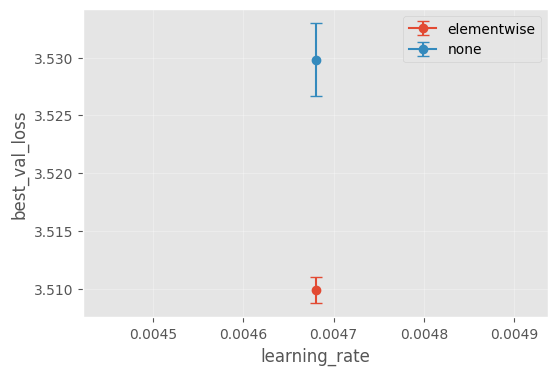

In [4]:
# Simple grouping
stage = df.copy()
if not stage.empty:
    agg = stage.groupby(["attn_gate", "learning_rate"]).agg(
        runs=("run_id", "count"),
        mean_best_val=("best_val_loss", "mean"),
        std_best_val=("best_val_loss", "std"),
        mean_ms_step=("ms_per_step", "mean"),
    ).reset_index()
    display(agg)
    if not agg.empty:
        fig, ax = plt.subplots(figsize=(6,4))
        for gate, sub in agg.groupby('attn_gate'):
            ax.errorbar(sub['learning_rate'], sub['mean_best_val'], yerr=sub['std_best_val'], marker='o', capsize=4, label=gate)
        ax.set_xlabel('learning_rate')
        ax.set_ylabel('best_val_loss')
        ax.legend()
        ax.grid(True, alpha=0.3)
        plt.show()
else:
    print("No stage 2.5 data yet; run jobs first.")

In [5]:
# Parse logs and plot curves
VAL_RE = re.compile(r"step:(\d+)/(\d+).*val_loss:([0-9.]+).*train_time:(\d+)ms")
rows = []
for path in Path(LOG_DIR).glob('*.txt') if os.path.exists(LOG_DIR) else []:
    run_id = path.stem
    cfg = stage[stage['run_id']==run_id]
    if cfg.empty:
        continue
    cfg = cfg.iloc[0]
    with open(path) as f:
        for line in f:
            m = VAL_RE.search(line)
            if m:
                step = int(m.group(1))
                loss = float(m.group(3))
                t_ms = int(m.group(4))
                rows.append({'run_id': run_id, 'step': step, 'val_loss': loss, 'train_time_ms': t_ms, 'attn_gate': cfg['attn_gate'], 'learning_rate': cfg['learning_rate']})
curves = pd.DataFrame(rows)
if not curves.empty:
    fig, axes = plt.subplots(1, len(curves['attn_gate'].unique()), figsize=(12,4), sharey=True)
    if len(curves['attn_gate'].unique())==1:
        axes=[axes]
    for ax, (gate, sub) in zip(axes, curves.groupby('attn_gate')):
        for lr, sublr in sub.groupby('learning_rate'):
            sublr = sublr.sort_values('train_time_ms')
            ax.plot(sublr['train_time_ms']/1000.0, sublr['val_loss'], label=f"lr={lr:.5f}")
        ax.set_title(f"attn_gate={gate}")
        ax.set_xlabel('train_time (s)')
        ax.set_ylabel('val_loss')
        ax.legend()
        ax.grid(True, alpha=0.3)
    plt.show()
else:
    print('No matching logs parsed; run jobs first.')

NameError: name 'Path' is not defined

In [ ]:
# Export curves
if 'curves' in locals() and not curves.empty:
    export_path = Path(PROJ_ROOT) / 'experiments' / 'log_curves_stage2_5.csv'
    export_path.parent.mkdir(parents=True, exist_ok=True)
    curves.to_csv(export_path, index=False)
    print(f'Saved curves to {export_path}')
else:
    print('curves is empty; nothing to export.')